# House Price Prediction

In [ ]:
# Import necessary libraries

import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### Load " House_Price" dataset

In [50]:
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [51]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


### Data Cleaning

In [52]:
df.shape

(21613, 21)

In [104]:
df.duplicated().sum()

if df.duplicated().sum() > 0:
    df.drop_duplicates(inplace=True)

In [54]:
print(df.describe())

# check categorical-like numeric fields
print(df['bedrooms'].value_counts().sort_index())
print(df['floors'].value_counts().sort_index())
print(df['waterfront'].value_counts().sort_index())
print(df['view'].value_counts().sort_index())

                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517    

In [55]:
df[(df['bedrooms'] == 0) | (df['bedrooms'] > 10)]
df[df['bathrooms'] == 0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
875,6306400140,20140612T000000,1095000.0,0,0.0,3064,4764,3.5,0,2,...,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000
1149,3421079032,20150217T000000,75000.0,1,0.0,670,43377,1.0,0,0,...,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882
3119,3918400017,20150205T000000,380000.0,0,0.0,1470,979,3.0,0,2,...,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399
5832,5702500050,20141104T000000,280000.0,1,0.0,600,24501,1.0,0,0,...,3,600,0,1950,0,98045,47.5316,-121.749,990,22549
6994,2954400190,20140624T000000,1295650.0,0,0.0,4810,28008,2.0,0,0,...,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061
9773,3374500520,20150429T000000,355000.0,0,0.0,2460,8049,2.0,0,0,...,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050
9854,7849202190,20141223T000000,235000.0,0,0.0,1470,4800,2.0,0,0,...,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200
10481,203100435,20140918T000000,484000.0,1,0.0,690,23244,1.0,0,0,...,7,690,0,1948,0,98053,47.6429,-121.955,1690,19290
14423,9543000205,20150413T000000,139950.0,0,0.0,844,4269,1.0,0,0,...,7,844,0,1913,0,98001,47.2781,-122.250,1380,9600
19452,3980300371,20140926T000000,142000.0,0,0.0,290,20875,1.0,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850


In [56]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [57]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [58]:
df['date'] = pd.to_datetime(df['date'])

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [60]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [61]:
df.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,2014-10-29 04:38:01.959931648,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
min,1.000102e+06,2014-05-02 00:00:00,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,2014-07-22 00:00:00,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,2015-02-17 00:00:00,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631


In [62]:
# Calculate Q1, Q3, and IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_iqr = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

print("\nOutliers using IQR:")
print(outliers_iqr)



Outliers using IQR:
               id       date      price  bedrooms  bathrooms  sqft_living  \
5      7237550310 2014-05-12  1225000.0         4       4.50         5420   
21     2524049179 2014-08-26  2000000.0         3       2.75         3050   
49      822039084 2015-03-11  1350000.0         3       2.50         2753   
69     1802000060 2014-06-12  1325000.0         5       2.25         3200   
125    4389200955 2015-03-02  1450000.0         4       2.75         2750   
...           ...        ...        ...       ...        ...          ...   
21568   524059330 2015-01-30  1700000.0         4       3.50         3830   
21576  9253900271 2015-01-07  3567000.0         5       4.50         4850   
21590  7430200100 2014-05-14  1222500.0         4       3.50         4910   
21597   191100405 2015-04-21  1575000.0         4       3.25         3410   
21600   249000205 2014-10-15  1537000.0         5       3.75         4470   

       sqft_lot  floors  waterfront  view  ...  grade 

In [63]:
# IQR outliers for all numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

outlier_rows = set()
summary = []
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    mask = (df[col] < lower) | (df[col] > upper)
    count = mask.sum()
    summary.append((col, int(count), round(count / len(df) * 100, 3)))
    outlier_rows.update(df.index[mask].tolist())

summary_df = pd.DataFrame(summary, columns=['column','outlier_count','outlier_pct']).set_index('column').sort_values('outlier_count', ascending=False)
print(summary_df)
print(f"\nRows with any numeric-column IQR outlier: {len(outlier_rows)}")
# show a few example outlier rows (if you want)
if outlier_rows:
    display(df.loc[sorted(outlier_rows)].head())

               outlier_count  outlier_pct
column                                   
sqft_lot                2425       11.220
sqft_lot15              2194       10.151
view                    2124        9.827
grade                   1911        8.842
price                   1146        5.302
yr_renovated             914        4.229
sqft_above               611        2.827
sqft_living              572        2.647
bathrooms                571        2.642
bedrooms                 546        2.526
sqft_living15            544        2.517
sqft_basement            496        2.295
long                     256        1.184
waterfront               163        0.754
condition                 30        0.139
lat                        2        0.009
id                         0        0.000
floors                     0        0.000
zipcode                    0        0.000
yr_built                   0        0.000

Rows with any numeric-column IQR outlier: 6679


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5,7237550310,2014-05-12,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
10,1736800520,2015-04-03,662500.0,3,2.50,3560,9796,1.0,0,0,...,8,1860,1700,1965,0,98007,47.6007,-122.145,2210,8925
12,114101516,2014-05-28,310000.0,3,1.00,1430,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
15,9297300055,2015-01-24,650000.0,4,3.00,2950,5000,2.0,0,3,...,9,1980,970,1979,0,98126,47.5714,-122.375,2140,4000


## EDA Visualisation

#### UNIVARIANT
1. Histogram

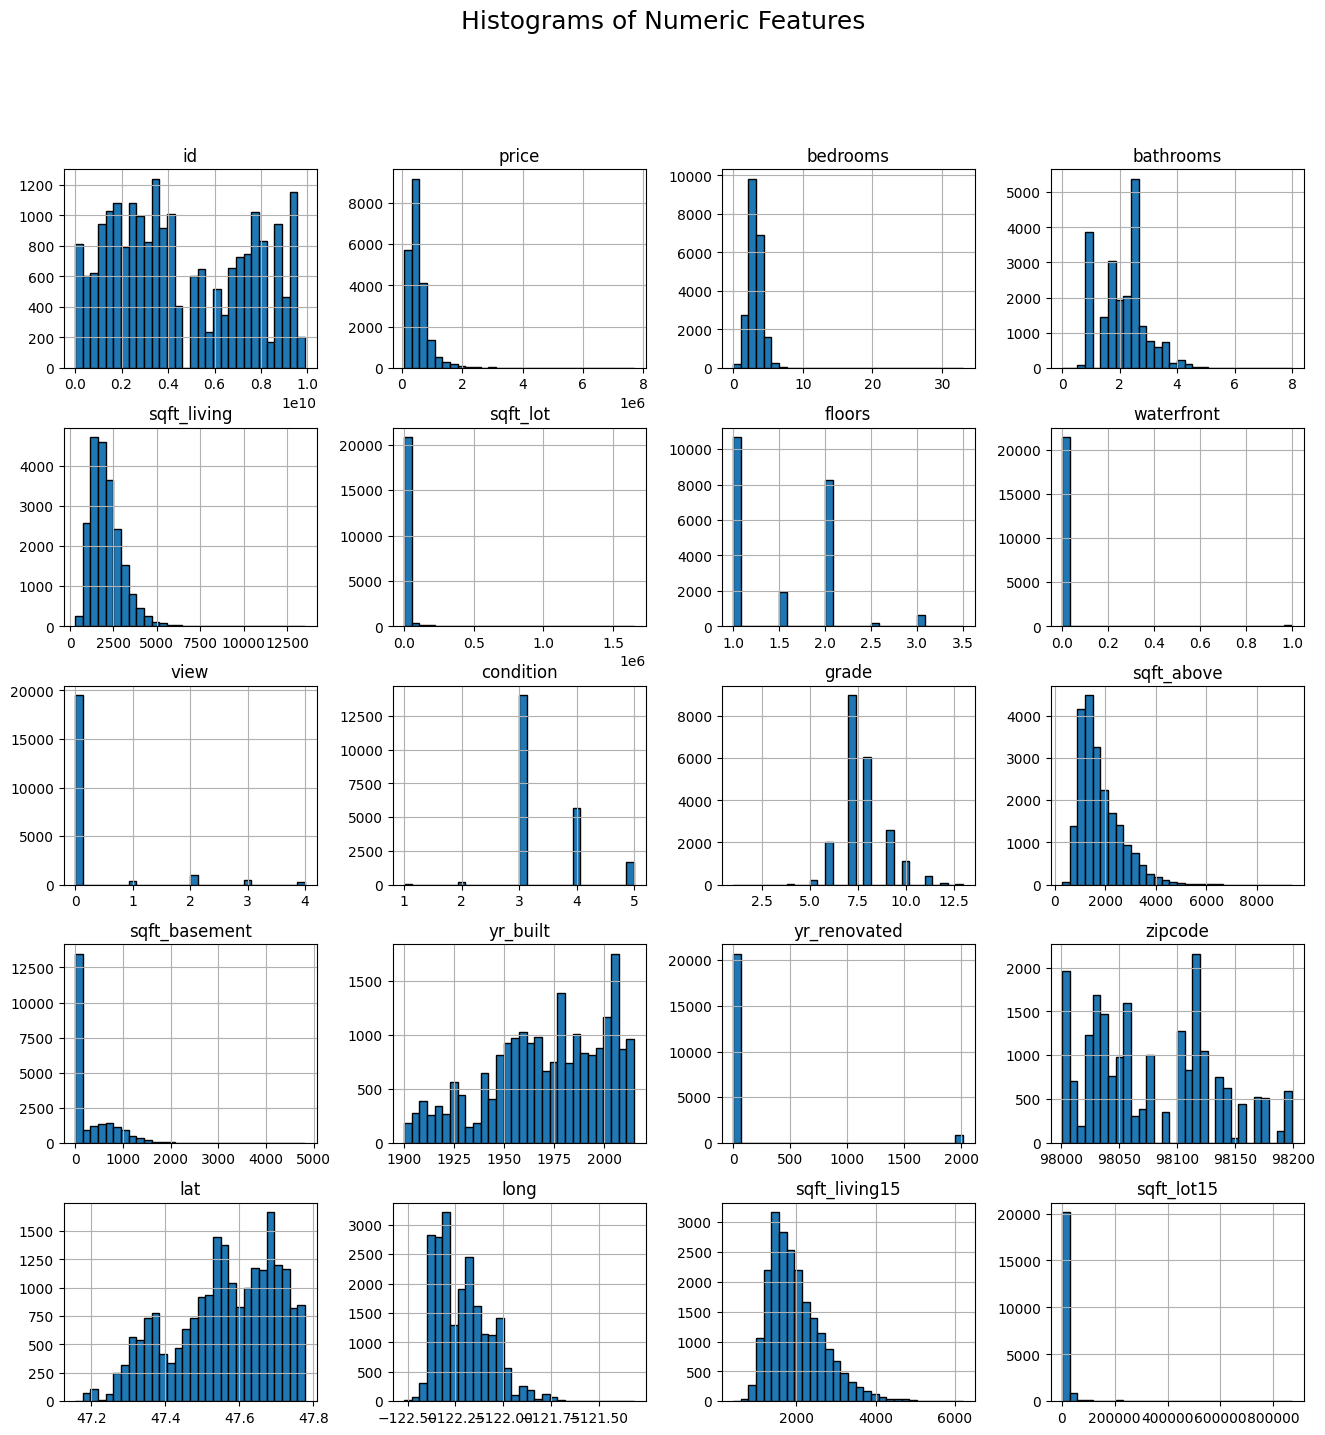

In [64]:
numeric_cols = df.select_dtypes(include=np.number).columns

df[numeric_cols].hist(figsize=(16, 16), bins=30, edgecolor='black')
plt.suptitle("Histograms of Numeric Features", fontsize=18)
plt.show()

2. Box plot

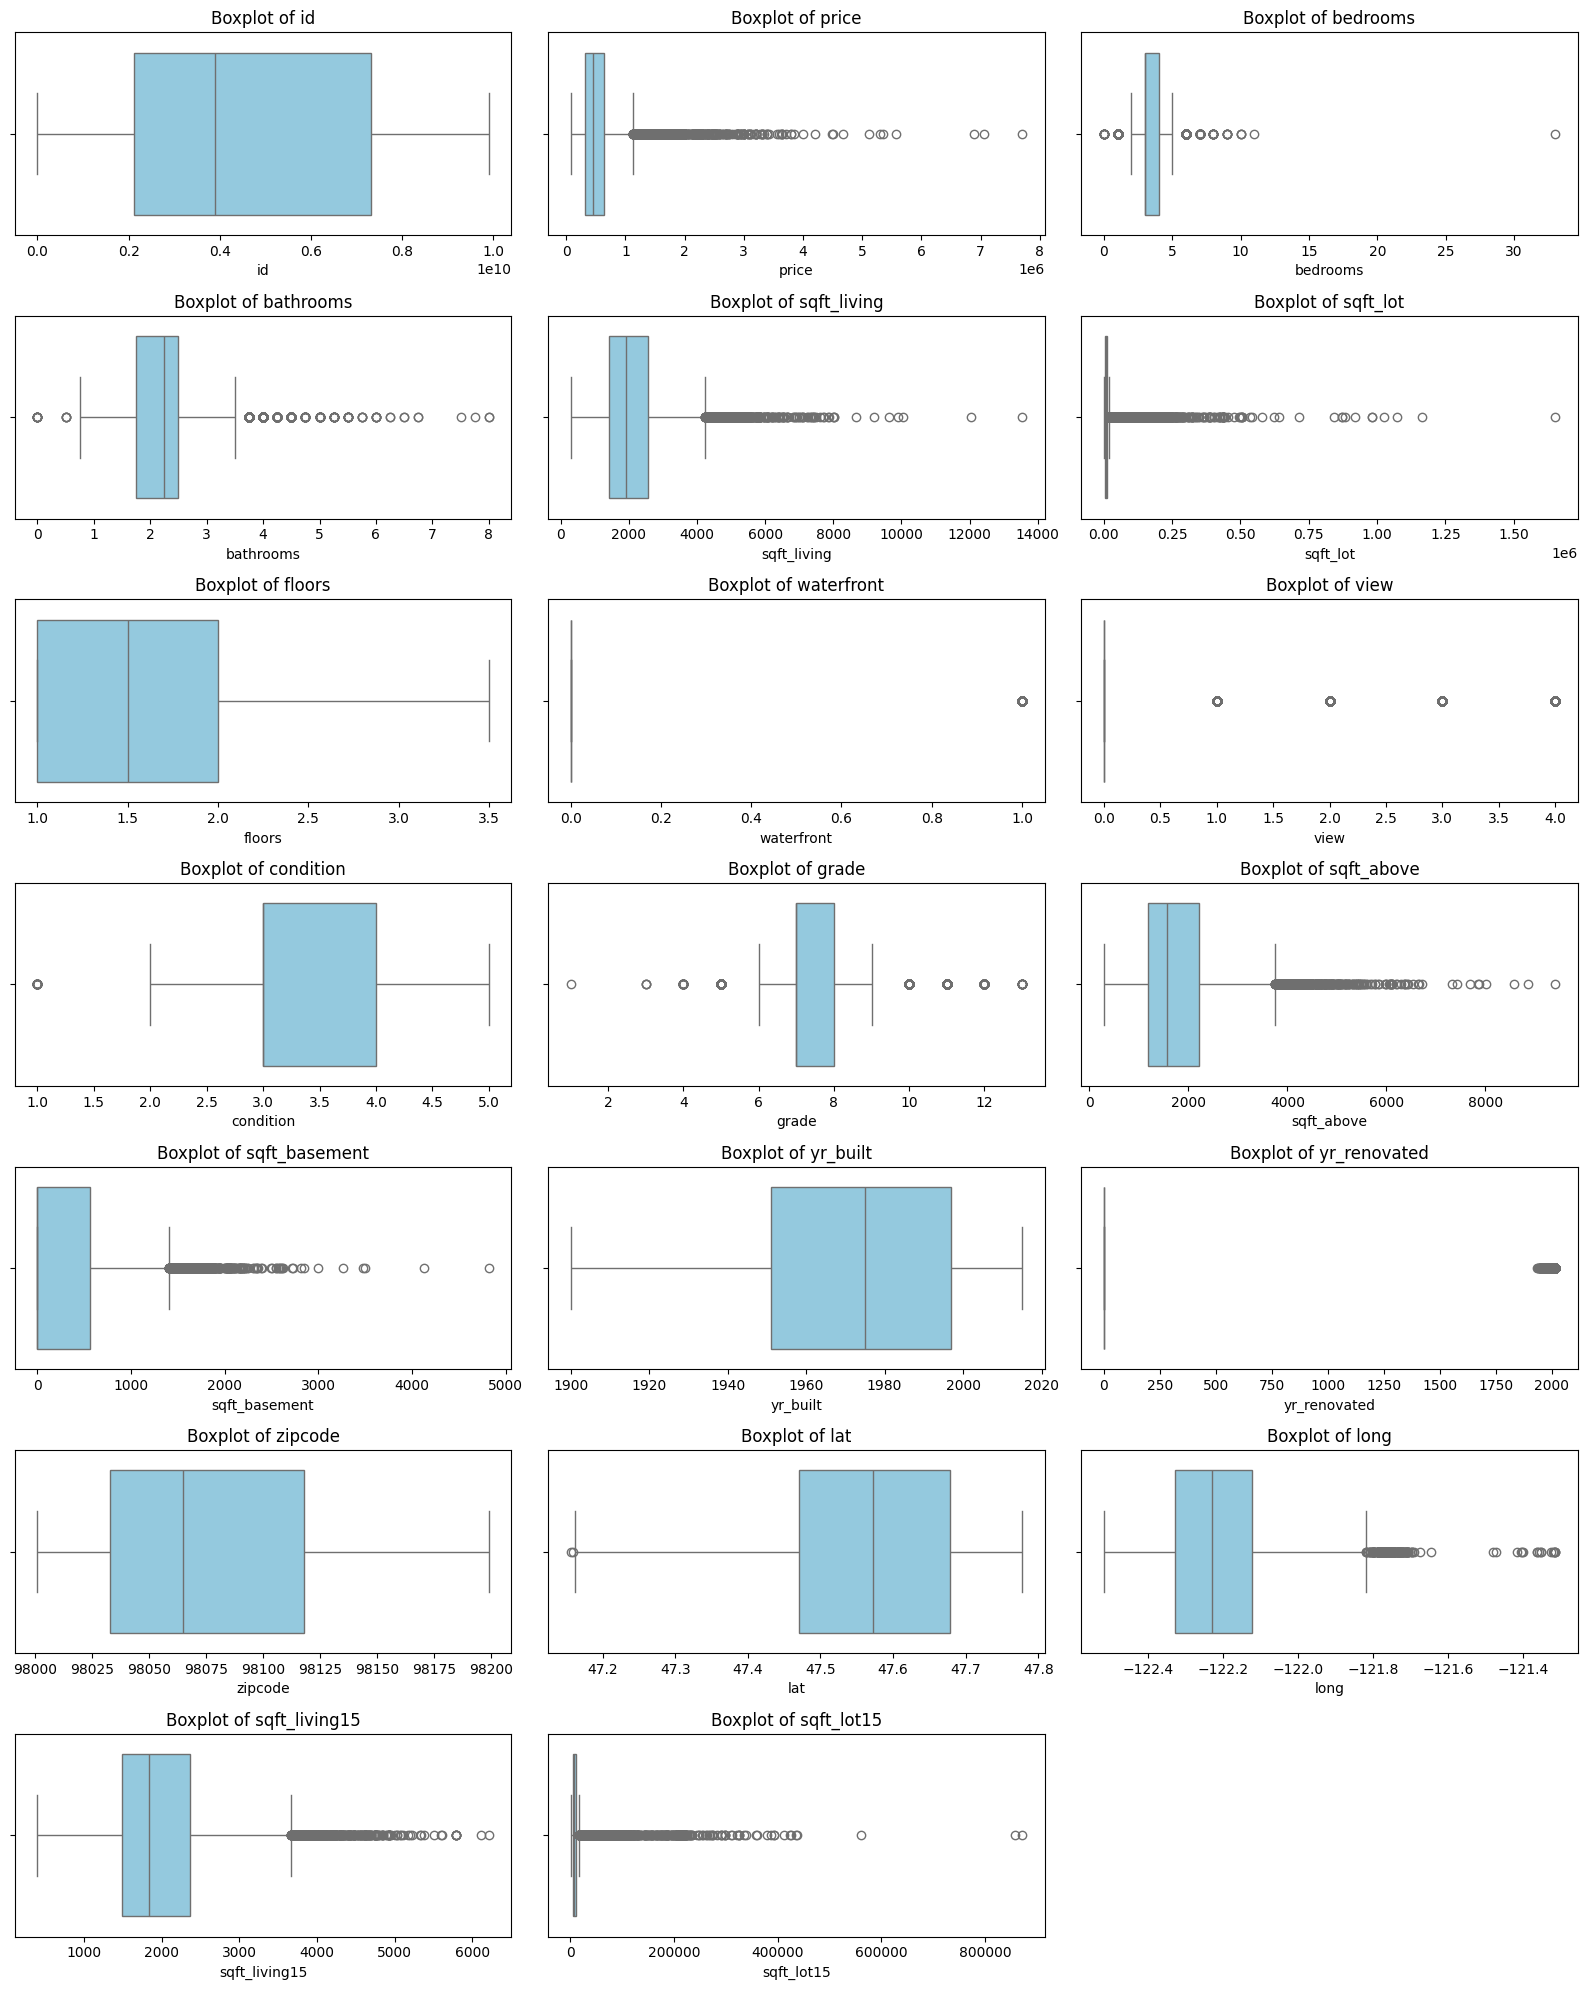

In [65]:
plt.figure(figsize=(16, 20))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols)//3 + 1, 3, i)
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

3. Count plot for Categorical Variables

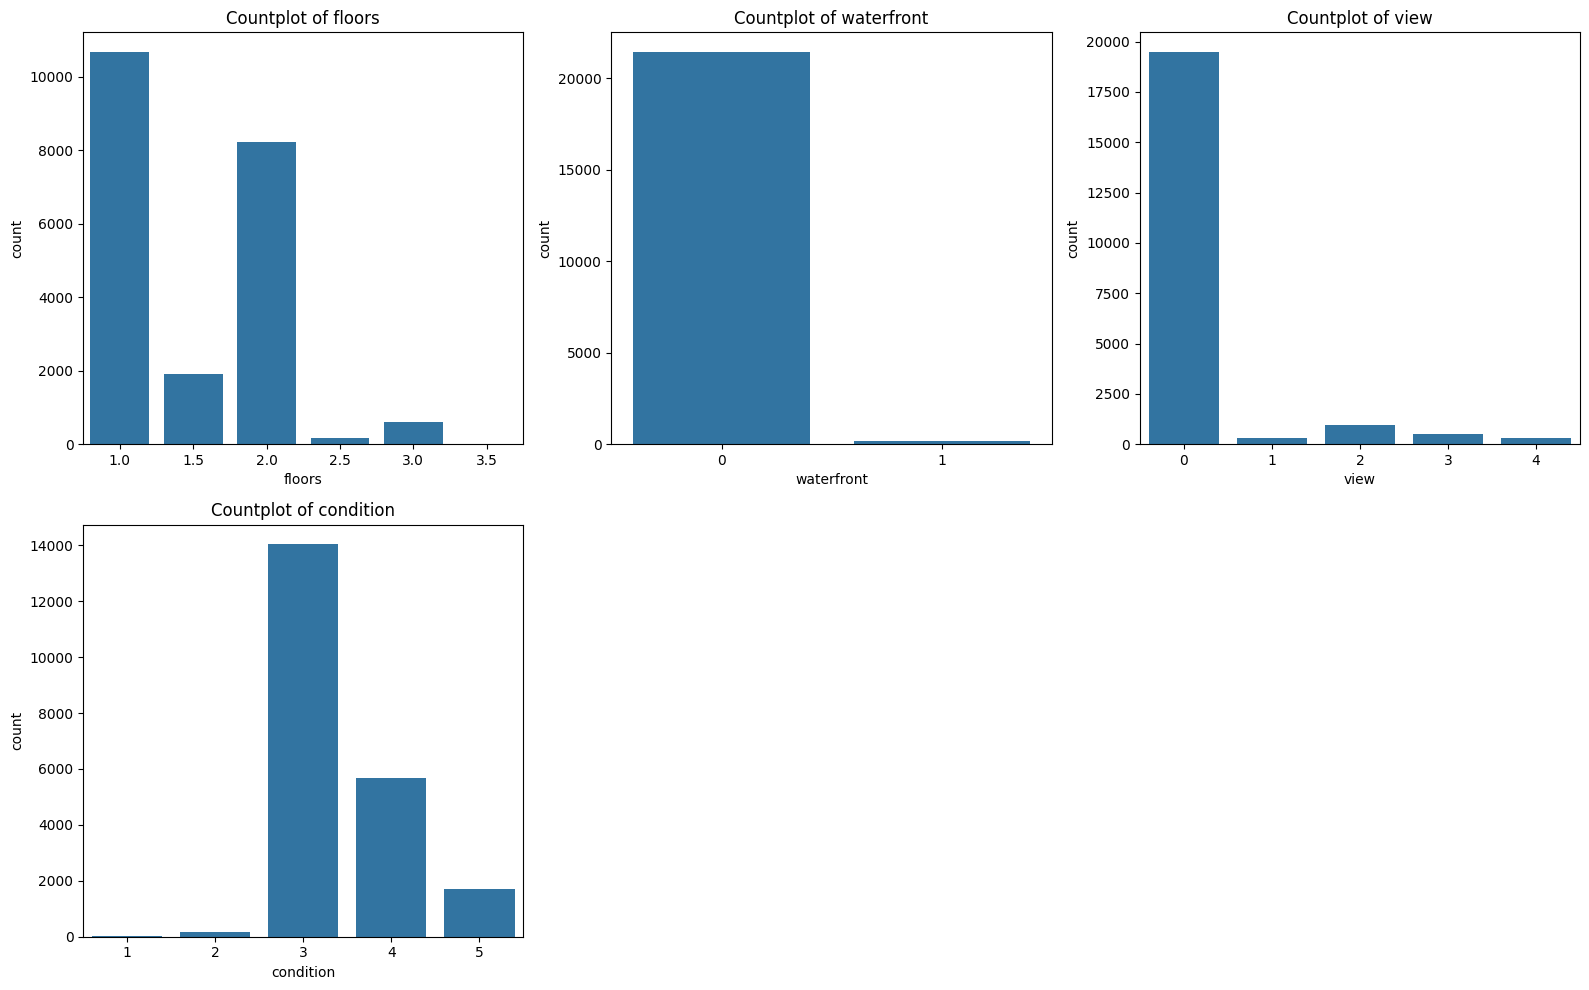

In [66]:
categorical_cols = [col for col in df.columns if df[col].nunique() < 10]

plt.figure(figsize=(16, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(len(categorical_cols)//3 + 1, 3, i)
    sns.countplot(x=df[col])
    plt.title(f"Countplot of {col}")

plt.tight_layout()
plt.show()


#### BIVARIANT
1. Scatterplot

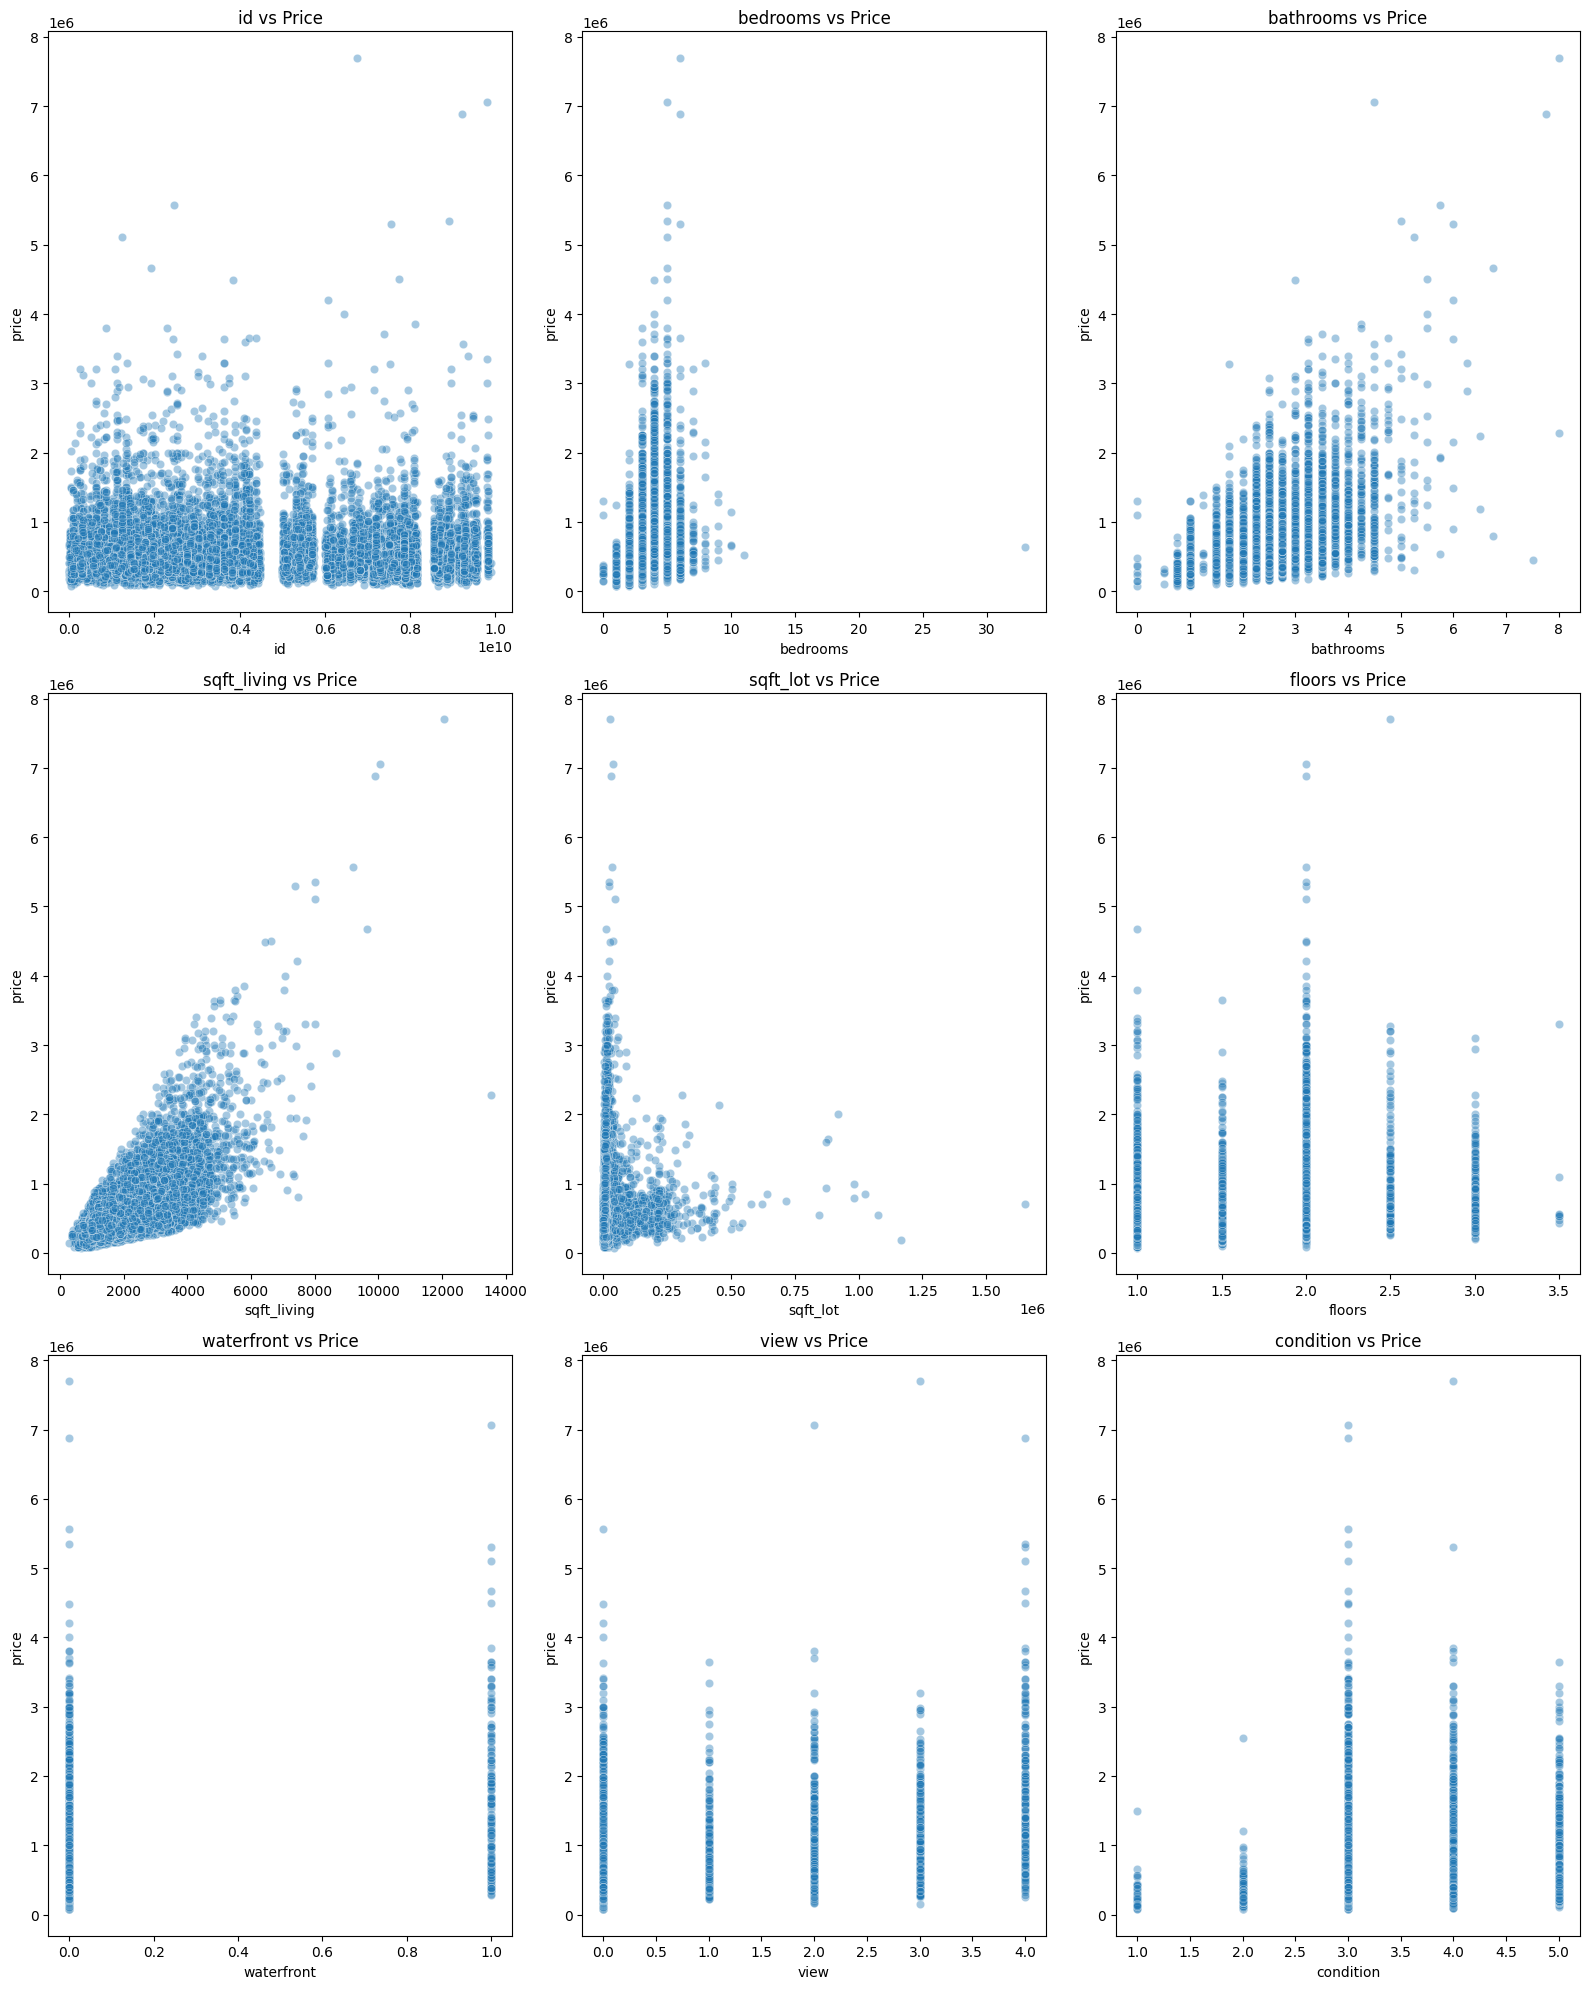

In [67]:
numeric_cols = df.select_dtypes(include=np.number).columns
numeric_cols = [col for col in numeric_cols if col != 'price']

plt.figure(figsize=(16, 20))
for i, col in enumerate(numeric_cols[:9], 1):   # show first 9 to avoid clutter
    plt.subplot(3, 3, i)
    sns.scatterplot(x=df[col], y=df['price'], alpha=0.4)
    plt.title(f"{col} vs Price")

plt.tight_layout()
plt.show()


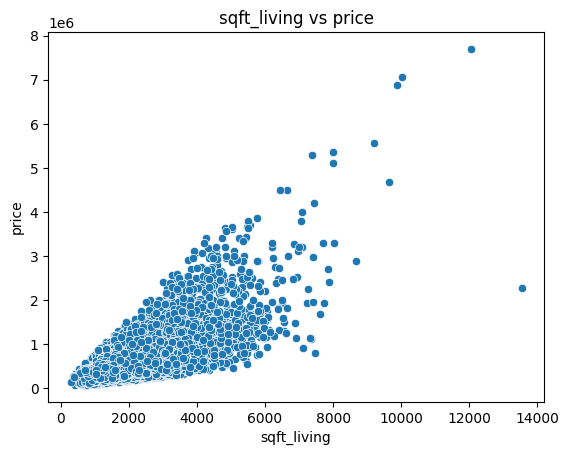

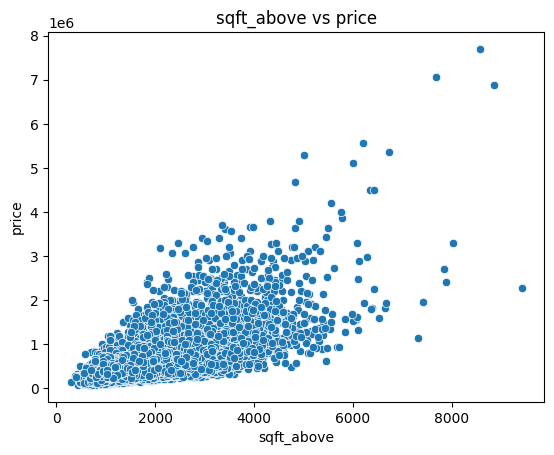

In [68]:
sns.scatterplot(x=df['sqft_living'], y=df['price'])
plt.title("sqft_living vs price")
plt.show()

sns.scatterplot(x=df['sqft_above'], y=df['price'])
plt.title("sqft_above vs price")
plt.show()

2. Box plot for all columns

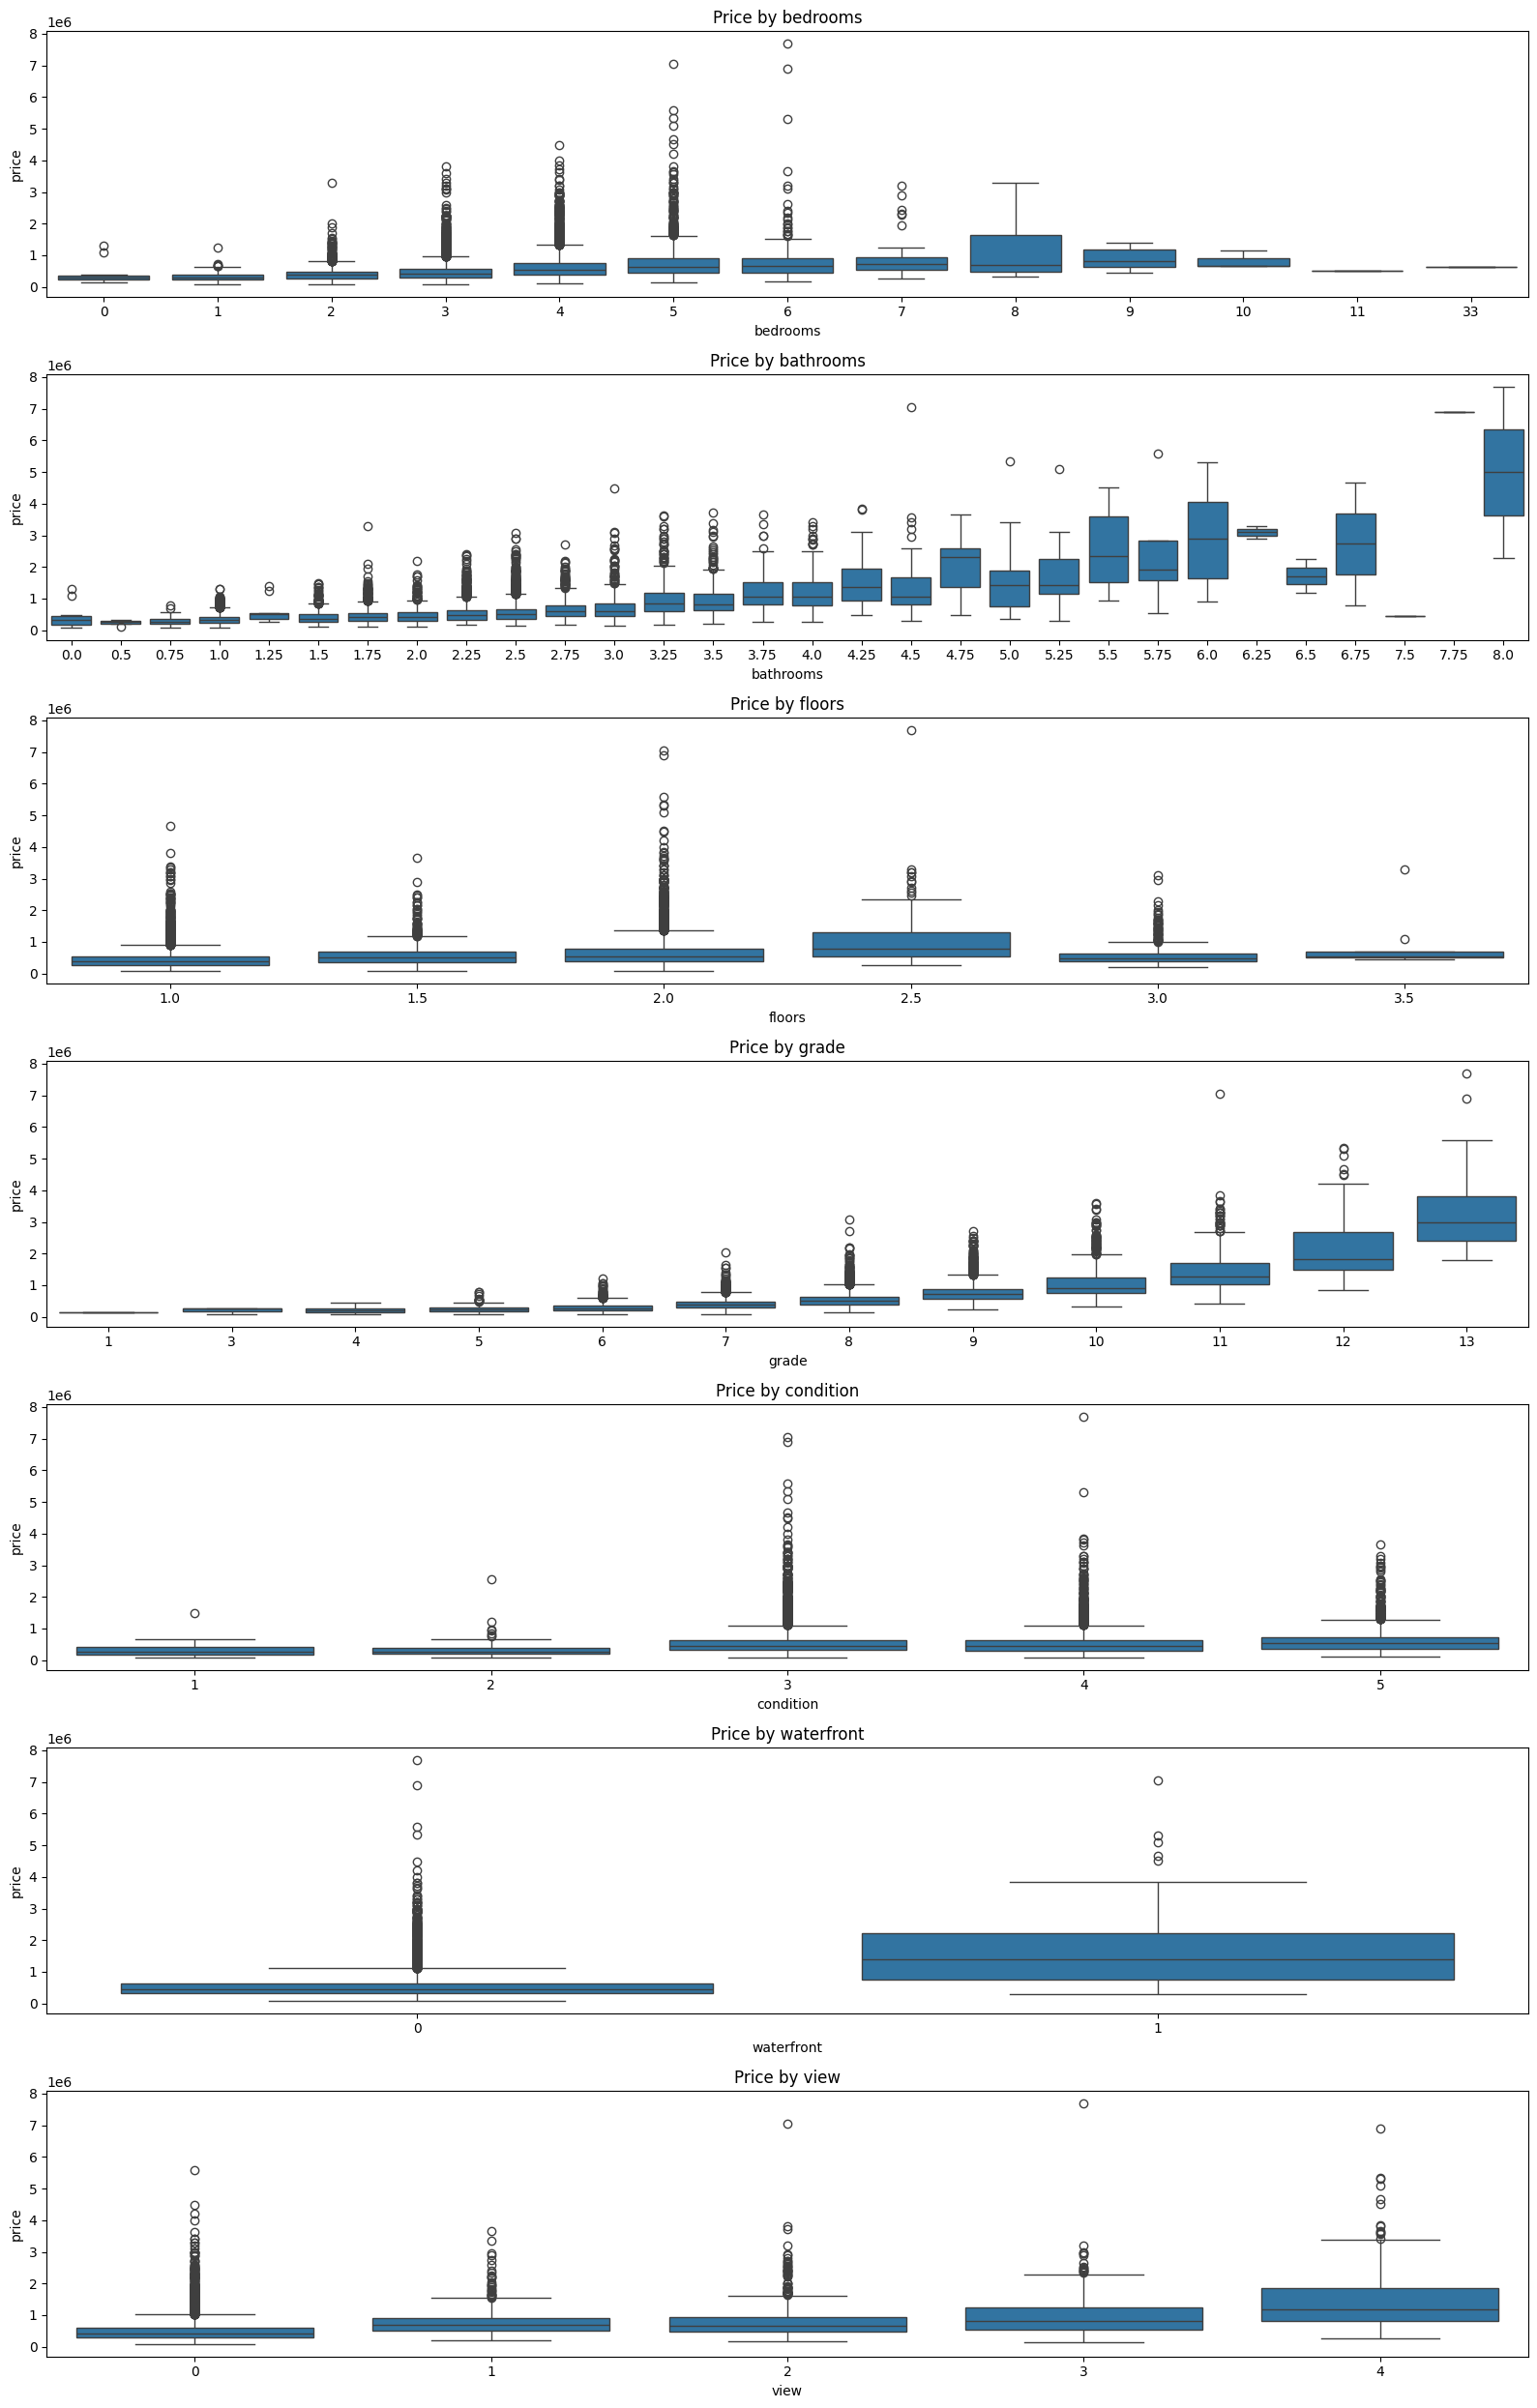

In [69]:
categorical_cols = ['bedrooms', 'bathrooms', 'floors', 'grade', 'condition', 'waterfront', 'view']

plt.figure(figsize=(16, 25))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(len(categorical_cols), 1, i)
    sns.boxplot(x=df[col], y=df['price'])
    plt.title(f"Price by {col}")

plt.tight_layout()
plt.show()


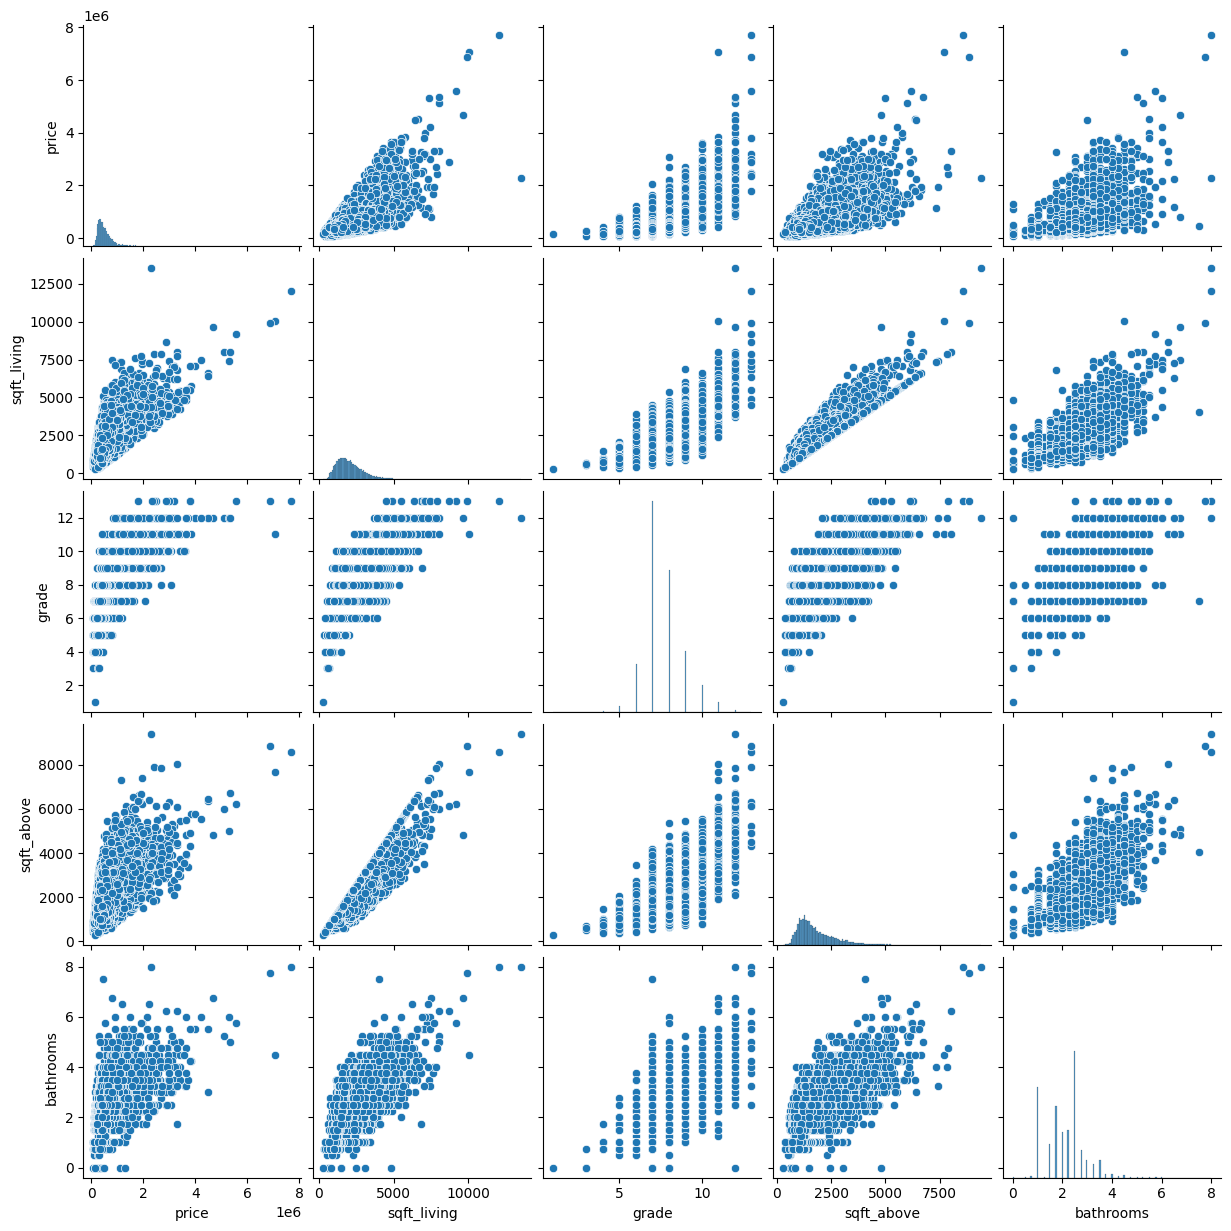

In [70]:
sns.pairplot(df[['price', 'sqft_living', 'grade', 'sqft_above', 'bathrooms']])
plt.show()

3. Correlation Matrix

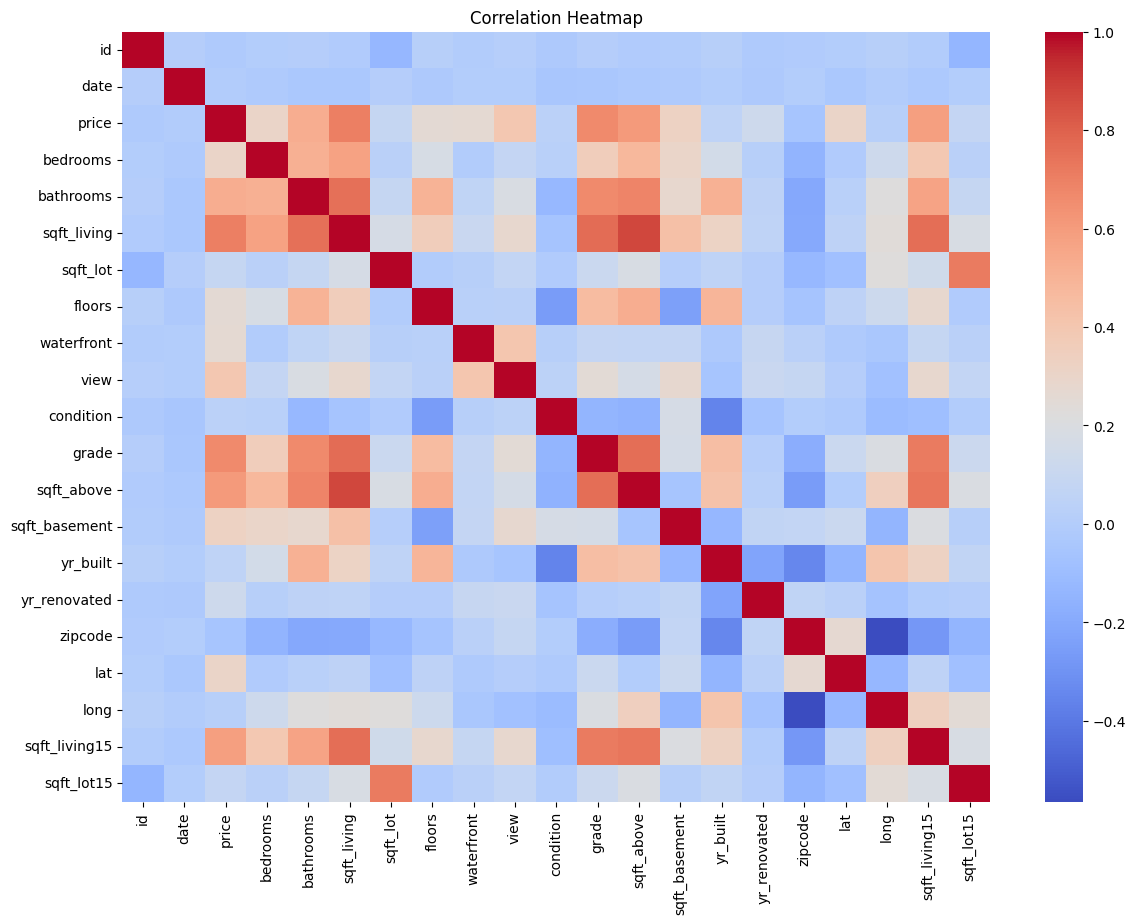

In [71]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [72]:
corr = df.corr()['price'].sort_values(ascending=False)
print(corr)


price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
date            -0.004357
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64


C:\Users\venut\AppData\Local\Temp\ipykernel_31832\1886732111.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['price'], shade=True)


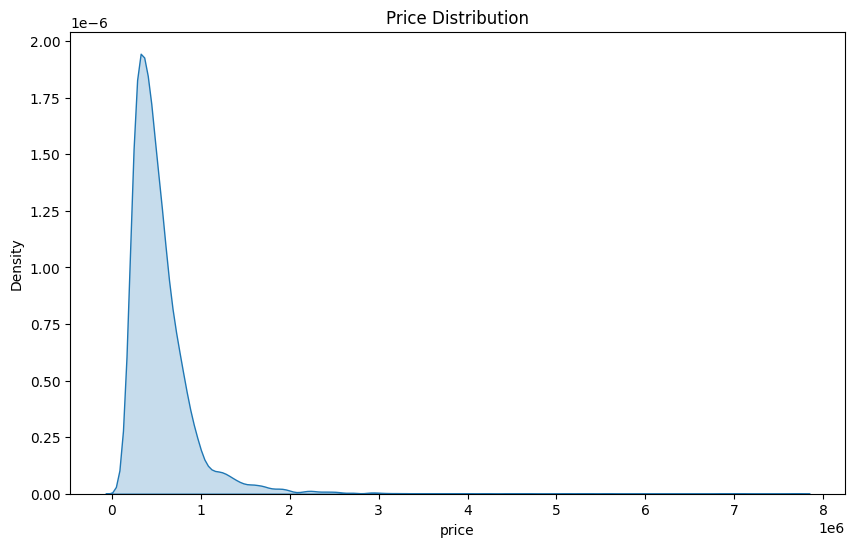

In [73]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['price'], shade=True)
plt.title("Price Distribution")
plt.show()



### Remove outliers

In [74]:
num_cols = [
    'price', 'sqft_living', 'sqft_lot', 'bedrooms', 'bathrooms',
    'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15'
]

# Function to cap outliers using IQR method
def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])
    
    print(f"{col}: Capped outliers using IQR method")
    return df

# Apply to each numeric column
for col in num_cols:
    df = cap_outliers(df, col)

# Check
df[num_cols].describe()

price: Capped outliers using IQR method
sqft_living: Capped outliers using IQR method
sqft_lot: Capped outliers using IQR method
bedrooms: Capped outliers using IQR method
bathrooms: Capped outliers using IQR method
sqft_above: Capped outliers using IQR method
sqft_basement: Capped outliers using IQR method
sqft_living15: Capped outliers using IQR method
sqft_lot15: Capped outliers using IQR method


,price,sqft_living,sqft_lot,bedrooms,bathrooms,sqft_above,sqft_basement,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.115873e+05,2058.078564,8705.224448,3.362791,2.098477,1769.563041,284.050155,1975.112849,8298.152917
std,2.500026e+05,839.307806,5046.482073,0.854105,0.722027,764.029323,417.064559,648.999108,4363.479209
min,7.500000e+04,290.000000,520.000000,1.500000,0.625000,290.000000,0.000000,399.000000,651.000000
25%,3.219500e+05,1427.000000,5040.000000,3.000000,1.750000,1190.000000,0.000000,1490.000000,5100.000000
50%,4.500000e+05,1910.000000,7618.000000,3.000000,2.250000,1560.000000,0.000000,1840.000000,7620.000000
75%,6.450000e+05,2550.000000,10688.000000,4.000000,2.500000,2210.000000,560.000000,2360.000000,10083.000000
max,1.129575e+06,4234.500000,19160.000000,5.500000,3.625000,3740.000000,1400.000000,3665.000000,17557.500000


### Standardize

In [75]:
scale_cols = [
    'sqft_living', 'sqft_lot', 'bedrooms', 'bathrooms',
    'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15'
]

In [77]:
scaler = StandardScaler()
df[scale_cols] = scaler.fit_transform(df[scale_cols])

### Train Model

In [79]:
X = df.drop(columns=['price', 'id', 'date'])
y = df['price']

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Basic Model


In [81]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

In [83]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error :", mae)
print("Root Mean Squared Error :", rmse)
print("R2 Score:", r2)

Mean Absolute Error : 93157.87326500672
Root Mean Squared Error : 124182.8324210575
R2 Score: 0.7596511298962837


### Testing Multiple Model 

In [84]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [85]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

In [86]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    results.append([name, mae, mse, rmse, r2])

#### Performance Metrix

In [87]:
results_df = pd.DataFrame(results, columns=["Model", "MAE", "MSE", "RMSE", "R² Score"])
results_df.sort_values("RMSE", inplace=True)

results_df

,Model,MAE,MSE,RMSE,R² Score
2,Random Forest,56210.899463,6.891595e+09,83015.630132,0.892591
3,Gradient Boosting,63614.702075,7.930455e+09,89053.099547,0.876400
1,Decision Tree,79870.798635,1.411201e+10,118793.996655,0.780058
0,Linear Regression,93157.873265,1.542138e+10,124182.832421,0.759651


#### Best Parameter

In [88]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

In [89]:
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, 40, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

In [90]:
# 2. Randomized Search
# ----------------------------
rf = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,              # number of combinations to try
    cv=3,                   # 3-fold cross-validation
    verbose=2,
    n_jobs=-1,              # use all cores
    scoring='neg_mean_squared_error'
)

random_search.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


C:\Users\venut\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
21 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\venut\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\venut\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:\Users\venut\AppData\Roaming\Python\

,estimator,RandomForestR...ndom_state=42)
,param_distributions,"{'bootstrap': [True, False], 'max_depth': [10, 20, ...], 'max_features': ['auto', 'sqrt', ...], 'min_samples_leaf': [1, 2, ...], ...}"
,n_iter,20
,scoring,'neg_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [91]:
# 3. Best parameters and model
# ----------------------------
best_rf = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

Best Parameters: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 40, 'bootstrap': False}


In [92]:
y_pred_best = best_rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_best)
mse = mean_squared_error(y_test, y_pred_best)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_best)

print("MAE:", mae)
print("MSE:", mse)
print("Root Mean Squared Error :", rmse)
print("R² Score:", r2)

MAE: 57307.09820605867
MSE: 7044706655.229288
Root Mean Squared Error : 83932.75079031599
R² Score: 0.8902051736967815


#### Feature Importance

          Feature  Importance
14            lat    0.222417
8           grade    0.178525
2     sqft_living    0.162592
16  sqft_living15    0.094279
9      sqft_above    0.073609
1       bathrooms    0.044713
15           long    0.036696
11       yr_built    0.034703
13        zipcode    0.033710
6            view    0.023139
17     sqft_lot15    0.022893
3        sqft_lot    0.018755
10  sqft_basement    0.017236
0        bedrooms    0.014236
4          floors    0.009292
7       condition    0.006755
5      waterfront    0.003344
12   yr_renovated    0.003107


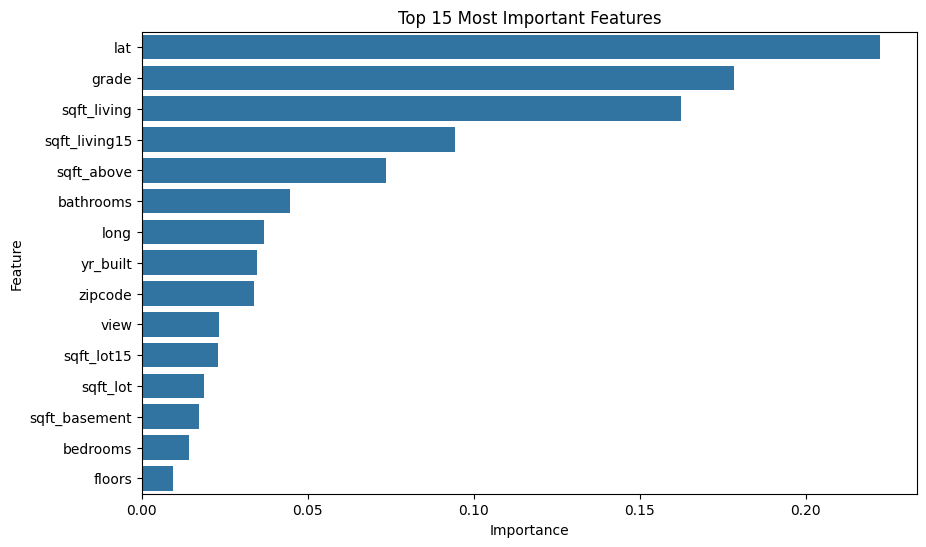

In [93]:
# Get feature importance from the best model
importances = best_rf.feature_importances_
feature_names = X_train.columns

# Create a dataframe
feat_imp = pd.DataFrame({ 'Feature': feature_names, 'Importance': importances }).sort_values(by='Importance', ascending=False)

# Show table
print(feat_imp)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp.head(15), x='Importance', y='Feature')
plt.title("Top 15 Most Important Features")
plt.show()

### Save the Final Model

Every ML project MUST save the trained model so it can be reused later.

In [2]:
import joblib


joblib.dump(best_rf, "best_rf_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("Model saved as best_rf_model.pkl")
print("Scaler saved as scaler.pkl")

NameError: name 'best_rf' is not defined

Prediction with unseen data

In [95]:
sample = {
    'bedrooms': 3,
    'bathrooms': 2.5,
    'sqft_living': 2000,
    'sqft_lot': 7500,
    'floors': 2,
    'waterfront': 0,
    'view': 0,
    'condition': 3,
    'grade': 7,
    'sqft_above': 1800,
    'sqft_basement': 200,
    'yr_built': 1990,
    'yr_renovated': 0,
    'zipcode': 98103,
    'lat': 47.65,
    'long': -122.34,
    'sqft_living15': 1800,
    'sqft_lot15': 5000
}


In [96]:
# Convert sample to DataFrame
sample_df = pd.DataFrame([sample])

# Predict price
predicted_price = best_rf.predict(sample_df)
print("Predicted House Price:", predicted_price[0])

Predicted House Price: 890840.255


In [100]:
df.drop(columns=["id", "date"], inplace=True)

df.to_csv("cleaned_original_data.csv", index=False)
print("cleaned_original_data.csv saved!")

cleaned_original_data.csv saved!
